In [130]:
import pandas as pd
import numpy as np

In [131]:
dataset = pd.read_csv("smsspamcollection.csv")

In [132]:
dataset

,label,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [133]:
dataset=dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [134]:
dataset

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [135]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [136]:
dataset.isnull().sum()

label    0
msg      0
dtype: int64

In [137]:
dataset['label'] = dataset['label'].map({'ham':0,'spam':1})

In [138]:
dataset

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

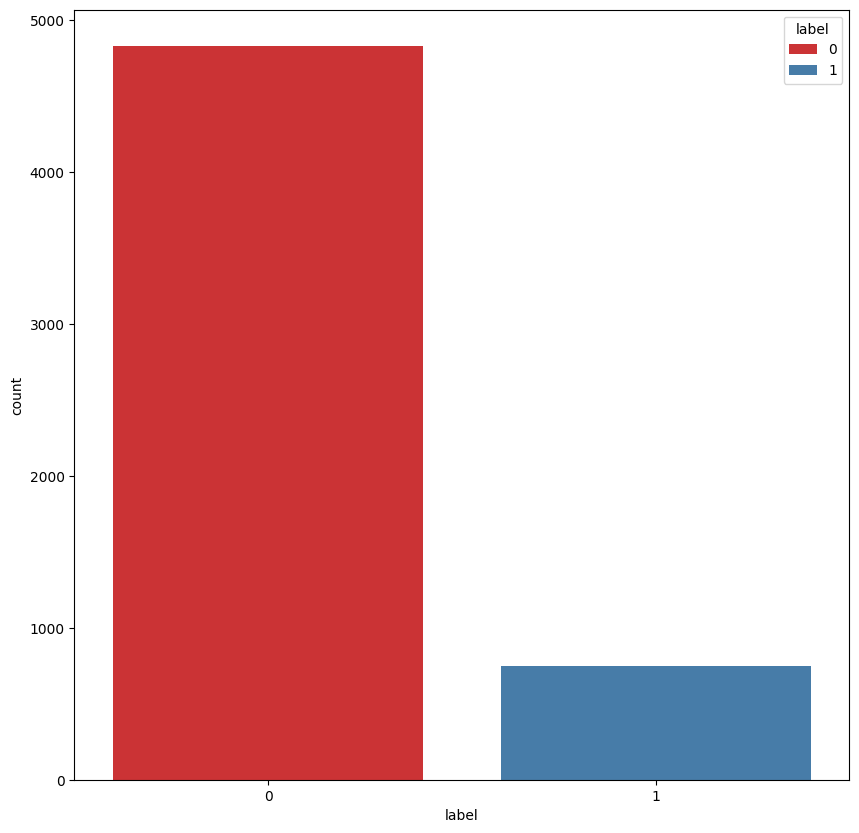

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.countplot(x='label', hue='label', data=dataset, palette='Set1', legend=True)
plt.show()



In [141]:
only_spam = dataset[dataset["label"]==1]

In [142]:
only_spam

,label,msg
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [143]:
count = int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [144]:
count

6

In [145]:
for i in range(count-1):
    dataset = pd.concat([dataset,only_spam])

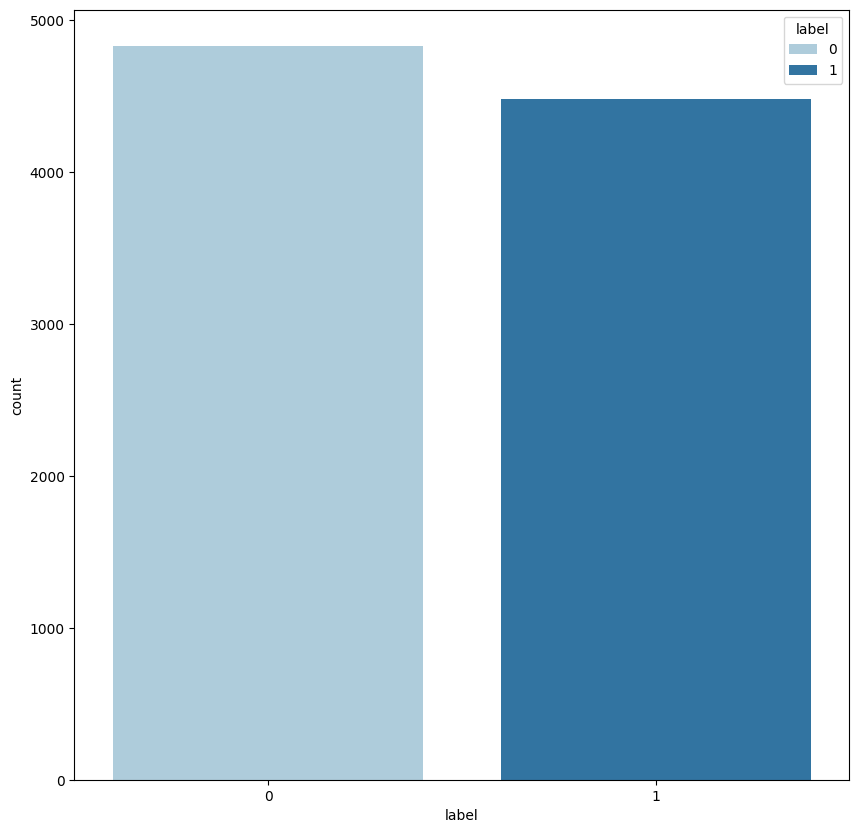

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.countplot(x='label', hue='label', data=dataset, palette='Paired', legend=True)
plt.show()


In [147]:
dataset["word_count"] = dataset["msg"].apply(lambda x:len(x.split()))

In [148]:
dataset


,label,msg,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


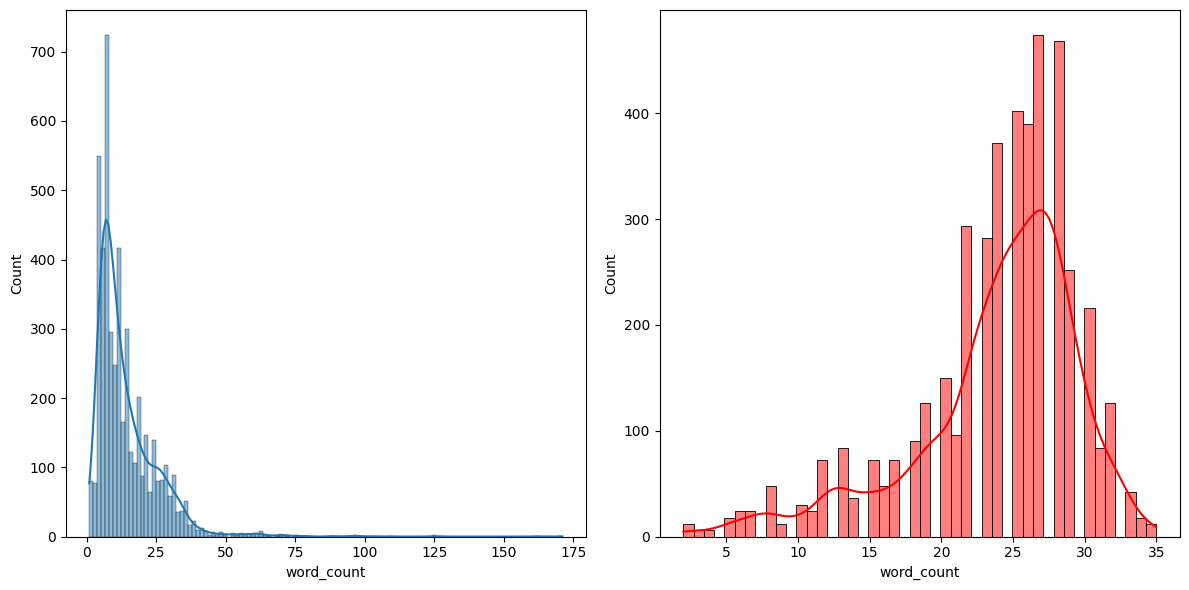

In [149]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(data= dataset[dataset['label']==0].word_count,kde = True)

plt.subplot(1,2,2)
sns.histplot(data= dataset[dataset['label']==1].word_count,kde = True,color ='red')
plt.tight_layout()
plt.show()

In [150]:
def currency(data):
    currency_symbols = ['€','$', '¥', '£','₹']
    for i in currency_symbols:
       if i in  data:
          return 1
    return 0

In [151]:
dataset["contains_currency_symbols"] = dataset["msg"].apply(currency)

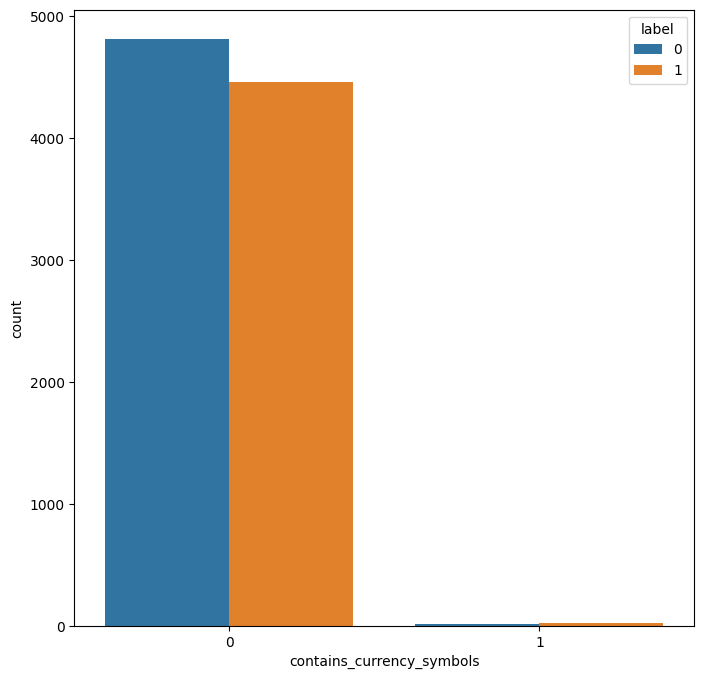

In [152]:
plt.figure(figsize=(8,8))
p = sns.countplot(x="contains_currency_symbols",data = dataset,hue = "label")

In [153]:
def number (data):
    for i  in data:
        if ord(i)>=48 and ord(i) <= 57:
            return 1
    return 0

In [154]:
dataset["contains_numbers"] = dataset["msg"].apply(number)

In [155]:
dataset

,label,msg,word_count,contains_currency_symbols,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


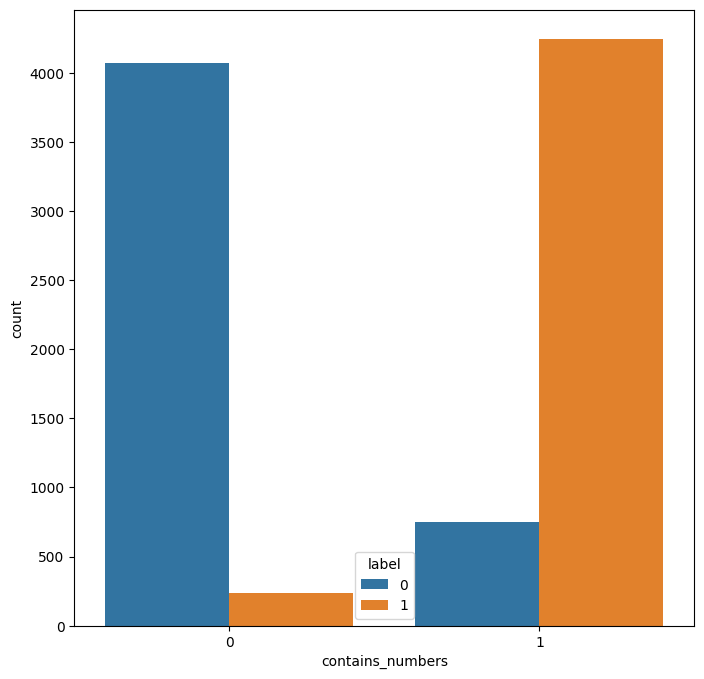

In [156]:
plt.figure(figsize=(8,8))
p = sns.countplot(x="contains_numbers",data = dataset,hue = "label")

In [157]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [158]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.msg):
    message = re.sub(pattern = '[^a-zA-Z]',repl=' ',string=sms)
    words = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    corpus.append(message)

In [159]:
corpus

['Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry wkly comp win FA Cup final tkts st May Text FA receive entry question std txt rate T C apply',
 'U dun say early hor U c already say',
 'Nah I think go usf life around though',
 'FreeMsg Hey darling week word back I like fun still Tb ok XxX std chgs send rcv',
 'Even brother like speak They treat like aid patent',
 'As per request Melle Melle Oru Minnaminunginte Nurungu Vettam set callertune Callers Press copy friend Callertune',
 'WINNER As valued network customer selected receivea prize reward To claim call Claim code KL Valid hour',
 'Had mobile month U R entitled Update latest colour mobile camera Free Call The Mobile Update Co FREE',
 'I gonna home soon want talk stuff anymore tonight k I cried enough today',
 'SIX chance win CASH From pound txt CSH send Cost p day day TsandCs apply Reply HL info',
 'URGENT You week FREE membership Prize Jackpot Txt word 

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500) 
vectors= tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [161]:
X = pd.DataFrame(vectors,columns = feature_names)
y = dataset['label']

In [162]:
X

,ac,access,account,admirer,age,all,already,also,always,am,...,xxx,ya,yeah,year,yes,yet,yo,you,your,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.409254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.259878,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.263115,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [163]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [164]:
 from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [166]:
 from sklearn.naive_bayes import MultinomialNB
mnb =MultinomialNB()
cv = cross_val_score(mnb,X,y, scoring = 'f1',cv= 10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.95
0.005


In [167]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

In [168]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       958
           1       0.96      0.94      0.95       904

    accuracy                           0.95      1862
   macro avg       0.95      0.95      0.95      1862
weighted avg       0.95      0.95      0.95      1862



In [170]:
 cm = confusion_matrix(y_test,y_pred)
cm 

array([[920,  38],
       [ 55, 849]], dtype=int64)

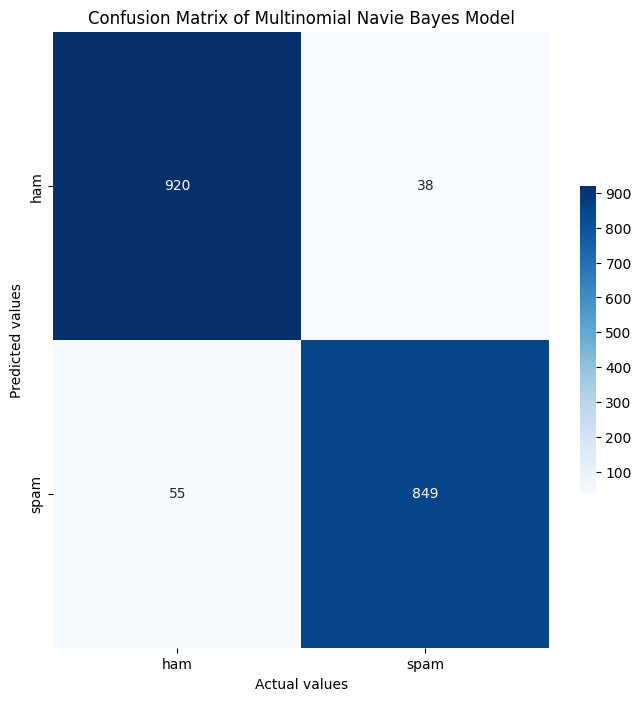

In [171]:
plt.figure(figsize=(8,8))
axis_labels = ['ham','spam']
sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5}, cmap="Blues")
p= plt.title("Confusion Matrix of Multinomial Navie Bayes Model")
p = plt.xlabel('Actual values')
p = plt.ylabel("Predicted values")

In [172]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt,X,y,scoring ='f1',cv = 10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.979
0.004


In [173]:
dt.fit(X_train,y_train)
y_pred1 = dt.predict(X_test)

In [174]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       958
           1       0.96      0.94      0.95       904

    accuracy                           0.95      1862
   macro avg       0.95      0.95      0.95      1862
weighted avg       0.95      0.95      0.95      1862



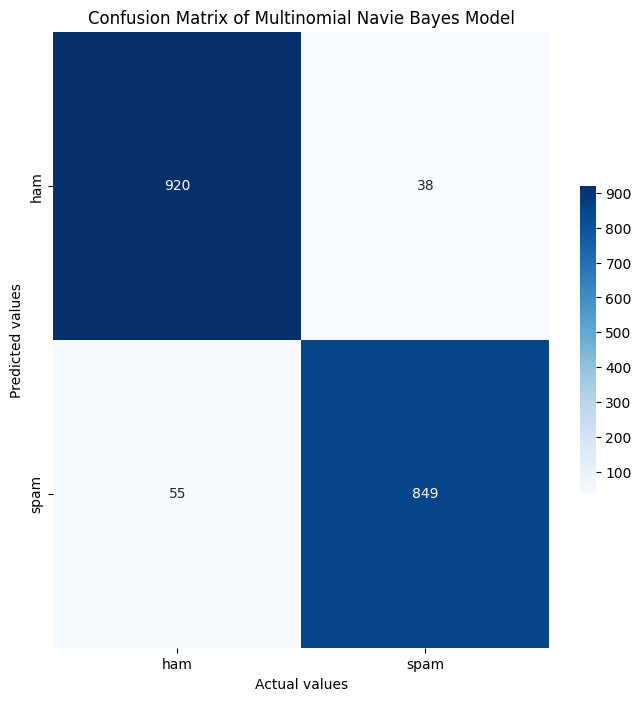

In [175]:
plt.figure(figsize=(8,8))
axis_labels = ['ham','spam']
sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5}, cmap="Blues")
p= plt.title("Confusion Matrix of Multinomial Navie Bayes Model")
p = plt.xlabel('Actual values')
p = plt.ylabel("Predicted values")

In [176]:
 cm = confusion_matrix(y_test,y_pred1)
cm 

array([[914,  44],
       [  3, 901]], dtype=int64)

In [177]:
def predict_spam(sms):
    
    message = re.sub(pattern = '[^a-zA-Z]',repl=' ',string=sms)
    words = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    temp  = tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [181]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)


In [182]:
#prediction 1 -Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compesation from miss-sold PPI on a credit or loan.Please reply PPI for info or STOP to opt out.'
if predict_spam(sample_message):
    print('Gotcha!This is a SPAM message.')
else:
    print('This is a HAM (normal) meassage.')
    

Gotcha!This is a SPAM message.
